In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
#Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
#Delimitamos que las columnas están separadas por una coma en el archivo de textos.
df0 = pd.read_csv('vid18_180219.dat', sep=',')
#Imprimimos el Data frame.head para ver la distribución de los 5 primeros datos.
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [3]:
#Creamos un nuevo DataFrame donde solo nos interesen las columnas de TIMESTAMP (fecha) y AitTC_Avg (Temperatura del aire en °C)
df1 = pd.DataFrame({"DATE" : df0.TIMESTAMP, "AIRTC" : df0.AirTC_Avg})
#Imprimimos los primeros 5 datos del nuevo DataFrame.
df1.head()

,AIRTC,DATE
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [4]:
#Para comprobar que sean variables de fecha y número:
df1.dtypes

AIRTC    float64
DATE      object
dtype: object

In [5]:
# Convertir la columna DATE a una variable tiempo.
# Se crea una nueva columna "FECHA" al final con formato de tiempo.
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['DATE'] , 1), dayfirst=True)
df1 = df1.drop(['DATE'], 1)

#Imprimos el DataFrame 
df1.head()


,AIRTC,FECHA
0,23.50,2018-05-11 20:10:00
1,22.96,2018-05-11 20:20:00
2,22.73,2018-05-11 20:30:00
3,22.40,2018-05-11 20:40:00
4,22.46,2018-05-11 20:50:00


In [6]:
#Verificamos que ahora la columna fecha sea una variable de tiempo:
df1.dtypes

AIRTC           float64
FECHA    datetime64[ns]
dtype: object

In [7]:
#Creamos una columna de meses y de días en el data frame:
df1['MES'] = df1['FECHA'].dt.month
df1['DÍA'] = df1['FECHA'].dt.day
df1['AÑO'] = df1['FECHA'].dt.year

#Imprimimos el Data Frame para ver los primeros 5 renglones con las columnas de los meses y de los días:
df1.head()

,AIRTC,FECHA,MES,DÍA,AÑO
0,23.50,2018-05-11 20:10:00,5,11,2018
1,22.96,2018-05-11 20:20:00,5,11,2018
2,22.73,2018-05-11 20:30:00,5,11,2018
3,22.40,2018-05-11 20:40:00,5,11,2018
4,22.46,2018-05-11 20:50:00,5,11,2018


In [8]:
#Los Datos se van a empezar a tomar desde el 1° de Noviembre de 2018
df1.iloc[[24935]]

,AIRTC,FECHA,MES,DÍA,AÑO
24935,9.13,2018-11-01,11,1,2018


In [9]:
#Creamos otro Data Frame para los días a partir del 1° de Noviembre.
df2 = pd.DataFrame({"FECHA" : df1[df1.index>=24935].FECHA, "AIRTC" : df1[df1.index>=24935].AIRTC})
#Mostramos el data frame.
df2.head()


,AIRTC,FECHA
24935,9.13,2018-11-01 00:00:00
24936,8.89,2018-11-01 00:10:00
24937,8.66,2018-11-01 00:20:00
24938,8.52,2018-11-01 00:30:00
24939,8.47,2018-11-01 00:40:00


In [10]:
#Para que el índice comience en el 0:
df3 = pd.DataFrame({"FECHA" : df2.FECHA, "AIRTC" : df2.AIRTC})
df3.index = np.arange(0, len(df2))
df3.head()

,AIRTC,FECHA
0,9.13,2018-11-01 00:00:00
1,8.89,2018-11-01 00:10:00
2,8.66,2018-11-01 00:20:00
3,8.52,2018-11-01 00:30:00
4,8.47,2018-11-01 00:40:00


In [11]:
#Creamos las columnas de días, meses y años:
df3['MES'] = df3['FECHA'].dt.month
df3['DÍA'] = df3['FECHA'].dt.day
df3['AÑO'] = df3['FECHA'].dt.year
df3['HORA'] = df3['FECHA'].dt.hour
df3['MINUTO'] = df3['FECHA'].dt.minute

#Imprimimos los primeros 5 renglones:
df3.head()

,AIRTC,FECHA,MES,DÍA,AÑO,HORA,MINUTO
0,9.13,2018-11-01 00:00:00,11,1,2018,0,0
1,8.89,2018-11-01 00:10:00,11,1,2018,0,10
2,8.66,2018-11-01 00:20:00,11,1,2018,0,20
3,8.52,2018-11-01 00:30:00,11,1,2018,0,30
4,8.47,2018-11-01 00:40:00,11,1,2018,0,40


In [12]:
#Calculo el PROMedio de la Temperatura por Horas
df3['PROMTH'] = df3.groupby(['AÑO','MES','DÍA','HORA'])['AIRTC'].transform('mean')
df3.head()

,AIRTC,FECHA,MES,DÍA,AÑO,HORA,MINUTO,PROMTH
0,9.13,2018-11-01 00:00:00,11,1,2018,0,0,8.708333
1,8.89,2018-11-01 00:10:00,11,1,2018,0,10,8.708333
2,8.66,2018-11-01 00:20:00,11,1,2018,0,20,8.708333
3,8.52,2018-11-01 00:30:00,11,1,2018,0,30,8.708333
4,8.47,2018-11-01 00:40:00,11,1,2018,0,40,8.708333


In [13]:
#Creamos otro Data Frames en base a los promedios de temperatura por hora.
df4 = pd.DataFrame({"FECHA" : df3[df3.MINUTO==0].FECHA, "PROMTH" : df3[df3.MINUTO==0].PROMTH, "HORA" : df3[df3.MINUTO==0].HORA, "DÍA" : df3[df3.MINUTO==0].DÍA, "MES" : df3[df3.MINUTO==0].MES, "AÑO" : df3[df3.MINUTO==0].AÑO})
df4.index = np.arange(0, len(df3)/6)
df4.head()

,AÑO,DÍA,FECHA,HORA,MES,PROMTH
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500


In [14]:
#Procedemos a calcular la unidad de frío por cada hora con las condiciones dadas:
#Menor que 1.5 = 0
#De 1.5 a menor de 2.5 = 0.5
#De 2.5 a menor de 9.2 = 1
#De 9.2 a menor de 12.5 = 0.5
#De 12.5 a menor de 16 = 0
#De 16 a menor de 18 = -0.5
#De 18 a mayor = -1
#ufd son las unidades de frío por día.

n = 0
ufd = []
for i in range (0,len(df4.PROMTH)):
    if(df4["PROMTH"][i]<=1.5):
        n = 0
    elif(df4["PROMTH"][i]>1.5 and df4["PROMTH"][i]<=2.5):
        n = 0.5
    elif(df4["PROMTH"][i]>2.5 and df4["PROMTH"][i]<=9.2):
        n = 1
    elif(df4["PROMTH"][i]>9.2 and df4["PROMTH"][i]<=12.5):
        n = 0.5
    elif(df4["PROMTH"][i]>12.5 and df4["PROMTH"][i]<=16):
        n = 0
    elif(df4["PROMTH"][i]>16 and df4["PROMTH"][i]<=18):
        n = -0.5
    elif(df4["PROMTH"][i]>18):
        n = -1
        
    ufd.append(n)
    n = 0
    
#UFH es la columna de Unidades de Frío por Hora.
df4['UFH'] = ufd
df4.head()

,AÑO,DÍA,FECHA,HORA,MES,PROMTH,UFH
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333,1.0
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333,1.0
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000,1.0
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667,1.0
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500,1.0


In [15]:
#UF24 es la columna con las Unidades de Frío por Día.
#Usamos un groupby para calcular la sumatoria de unidades de frío por día.

df4["UF24"] = df4.groupby(['AÑO','MES','DÍA'])['UFH'].transform('sum')

df4.head()


,AÑO,DÍA,FECHA,HORA,MES,PROMTH,UFH,UF24
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333,1.0,-0.5
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333,1.0,-0.5
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000,1.0,-0.5
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667,1.0,-0.5
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500,1.0,-0.5


In [16]:
#Obtenemos la tyemperatura máxima y mínima de cada día en base a la temperatura de cada hora:

df4['TMAX'] = df4.groupby(['AÑO','MES','DÍA'])['PROMTH'].transform('max')
df4['TMIN'] = df4.groupby(['AÑO','MES','DÍA'])['PROMTH'].transform('min')

df4.head()

,AÑO,DÍA,FECHA,HORA,MES,PROMTH,UFH,UF24,TMAX,TMIN
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333,1.0,-0.5,28.621667,6.806833
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333,1.0,-0.5,28.621667,6.806833
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000,1.0,-0.5,28.621667,6.806833
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667,1.0,-0.5,28.621667,6.806833
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500,1.0,-0.5,28.621667,6.806833


In [17]:
#Creamos un Data frame con los datos de las temperaturas máximas y mínimas diarias con sus respectivas unidades de frío.
df5 = pd.DataFrame({"FECHA" : df4[df4.HORA==0].FECHA, "AÑO" : df4[df4.HORA==0].AÑO,"MES" : df4[df4.HORA==0].MES, "DÍA" : df4[df4.HORA==0].DÍA, "UF24" : df4[df4.HORA==0].UF24, "TMAX" : df4[df4.HORA==0].TMAX, "TMIN" : df4[df4.HORA==0].TMIN})
df5.index = np.arange(0,len(df5))
df5.head()

,AÑO,DÍA,FECHA,MES,TMAX,TMIN,UF24
0,2018,1,2018-11-01,11,28.621667,6.806833,-0.5
1,2018,2,2018-11-02,11,30.960000,10.248333,-9.0
2,2018,3,2018-11-03,11,29.998333,10.473333,-9.0
3,2018,4,2018-11-04,11,31.243333,11.670000,-11.5
4,2018,5,2018-11-05,11,31.093333,11.435000,-8.0


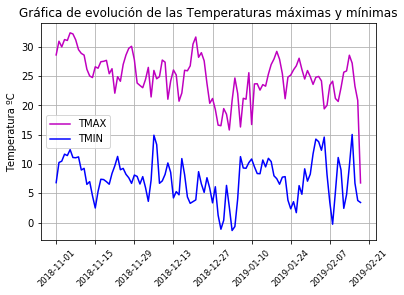

In [21]:
#Gráfica de la evolución de las temperaturas máximas y mínimas.
plt.plot_date(x=df5.FECHA, y=df5.TMAX, fmt="m")
plt.plot_date(x=df5.FECHA, y=df5.TMIN, fmt="b-")
plt.xticks(size='small', rotation=45)
plt.legend(loc='best')
plt.title("Gráfica de evolución de las Temperaturas máximas y mínimas")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.savefig('EvolTemp',plt=2000)
plt.show()

In [27]:
df5['UFACUM'] = df5.UF24.cumsum()
df5.head()

,AÑO,DÍA,FECHA,MES,TMAX,TMIN,UF24,UFACUM
0,2018,1,2018-11-01,11,28.621667,6.806833,-0.5,-0.5
1,2018,2,2018-11-02,11,30.960000,10.248333,-9.0,-9.5
2,2018,3,2018-11-03,11,29.998333,10.473333,-9.0,-18.5
3,2018,4,2018-11-04,11,31.243333,11.670000,-11.5,-30.0
4,2018,5,2018-11-05,11,31.093333,11.435000,-8.0,-38.0


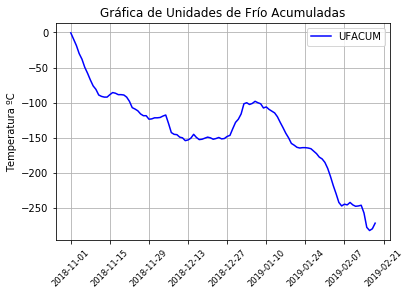

In [28]:
plt.plot_date(x=df5.FECHA, y=df5.UFACUM, fmt="b-")
plt.xticks(size='small', rotation=45)
plt.legend(loc='best')
plt.title("Gráfica de Unidades de Frío Acumuladas")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.savefig('UF24',plt=2000)
plt.show()